In [42]:
import numpy as np

class DualFloat():

    real_part: float
    dual_part: float

    def __init__(self, real_part: float, dual_part: float) -> None:
        self.real_part = real_part
        self.dual_part = dual_part

    def __add__(self, other):
        return DualFloat(self.real_part + other.real_part, self.dual_part + other.dual_part)
    
    def __sub__(self, other):
        return DualFloat(self.real_part - other.real_part, self.dual_part - other.dual_part)
    
    def __mul__(self, other):
        return DualFloat(self.real_part * other.real_part, self.real_part * other.dual_part + self.dual_part * other.real_part)
    
    def __div__(self, other):
        return DualFloat(self.real_part / other.real_part, ((self.dual_part * other.real_part) - (self.real_part * other.dual_part)) / (other.real_part * other.real_part))

    def __str__(self) -> str:
        return str(self.real_part) + " + " + str(self.dual_part) + "E"
    
# stupid wrapper because numpy array printing is stupid
class nparray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(cls)
    
    def __str__(self):
        return "[" + ", ".join(str(item) for item in self.flatten()) + "]"

In [ ]:
print(DualFloat(1, 2))
print(DualFloat(1, 2) + DualFloat(10, 20))
print(DualFloat(1, 2) * DualFloat(10, 20))

1 + 2E
11 + 22E
10 + 40E


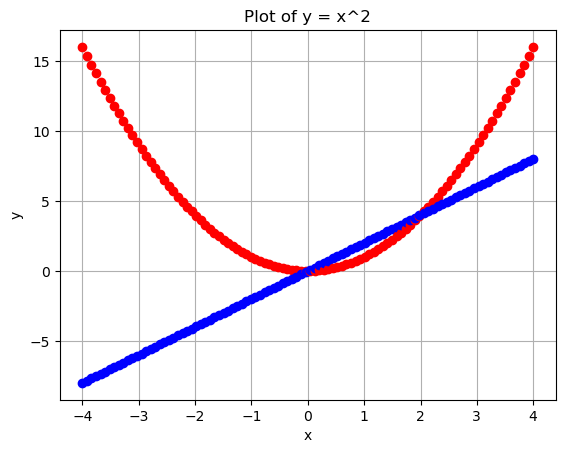

In [ ]:
import matplotlib.pyplot as plt

# Define range of x-values
x_min = -4
x_max = 4
num_points = 100

# Plot the function point-by-point
for i in range(num_points):
    x = x_min + (x_max - x_min) * i / (num_points - 1)
    full = DualFloat(x, 1) * DualFloat(x, 1)

    plt.plot(x, full.real_part, 'ro')
    plt.plot(x, full.dual_part, 'bo')

# Add title and labels
plt.title('Plot of y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

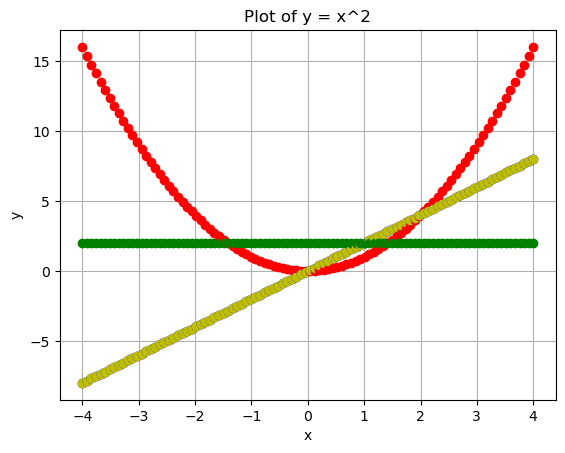

In [ ]:
# Define range of x-values
x_min = -4
x_max = 4
num_points = 100

# Plot the function point-by-point
for i in range(num_points):
    x = x_min + (x_max - x_min) * i / (num_points - 1)
    full = DualFloat(DualFloat(x, 1), DualFloat(1, 0)) * DualFloat(DualFloat(x, 1), DualFloat(1, 0))

    plt.plot(x, full.real_part.real_part, 'ro')
    plt.plot(x, full.real_part.dual_part, 'bo')
    plt.plot(x, full.dual_part.real_part, 'yo')
    plt.plot(x, full.dual_part.dual_part, 'go')

# Add title and labels
plt.title('Plot of y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [49]:
import numpy as np
from typing import List

one = nparray([1, 2])
two = nparray([3, 4])

print(DualFloat(one, two) + DualFloat(two, two))

one = nparray([DualFloat(1, 3), DualFloat(2, 4)])
two = nparray([DualFloat(2, 2), DualFloat(1, 1)])

print(one + two)

ones = nparray([1 for i in range(100)])
zeroes = nparray([1 for i in range(100)])

e_1 = zeroes
e_1[0] = 1

nums = nparray([DualFloat(i, 1 if i == 0 else 1) for i in range(10)])

def func(xs: List[DualFloat]):
    ys = xs
    for i in range(len(xs)):
        x = xs[i]
        y = DualFloat(1, 1)
        for j in range(i+1):
            y *= x
        ys[i] = y
    return ys

print(func(nums))

def func2(ins: List[DualFloat]):
    x = ins[0]
    y = ins[1]
    return (x * x) + (x * y)

print(nparray([DualFloat(3, 1), DualFloat(2, 0)]))

[4, 6] + [6, 8]E
[3 + 5E, 3 + 5E]
[0 + 1E, 1 + 3E, 8 + 20E, 81 + 189E, 1024 + 2304E, 15625 + 34375E, 279936 + 606528E, 5764801 + 12353145E, 134217728 + 285212672E, 3486784401 + 7360989291E]
[3 + 1E, 2 + 0E]


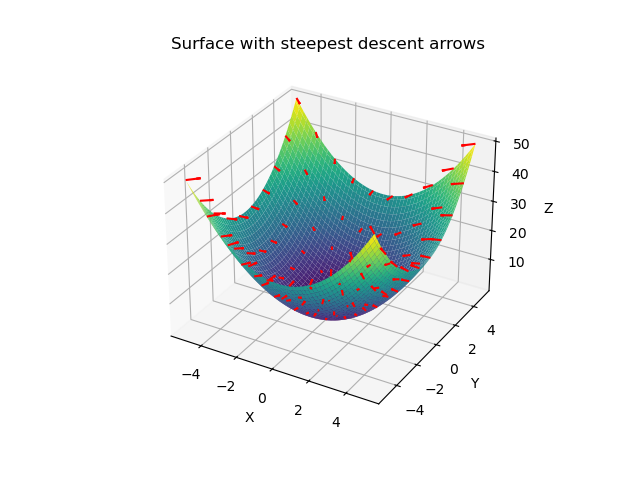

In [63]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define your surface function
def surface_function(x, y):
    return x**2 + y**2

# Define the gradient of the surface function
def gradient_surface_function(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return grad_x, grad_y

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = surface_function(X, Y)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Draw arrows representing the direction of steepest descent
sub_x = np.linspace(-5, 5, 10)
sub_y = np.linspace(-5, 5, 10)
sub_X, sub_Y = np.meshgrid(sub_x, sub_y)
sub_Z = surface_function(sub_X, sub_Y)

# Compute the gradient at each point on the surface
grad_x, grad_y = gradient_surface_function(sub_X, sub_Y)

arrow_scale = 0.05  # Scale factor for arrow length
ax.quiver(sub_X, sub_Y, sub_Z, -grad_x, -grad_y, np.zeros_like(sub_Z), length=arrow_scale, arrow_length_ratio=0.3, color='red')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface with steepest descent arrows')

plt.show()

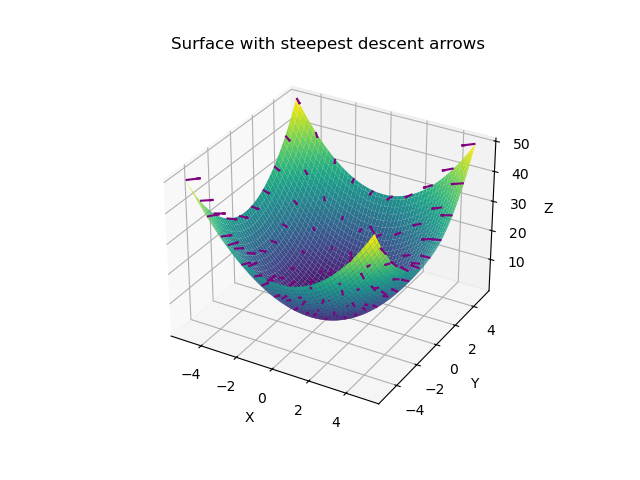

In [65]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define your surface function
def surface_function(x, y):
    return x*x + y*y

# Define the gradient of the surface function
# this is untenable for large dimensional inputs!
def gradient_surface_function(x, y):
    x_diffs = surface_function(DualFloat(x, 1), DualFloat(y, 0)).dual_part
    y_diffs = surface_function(DualFloat(x, 0), DualFloat(y, 1)).dual_part
    return x_diffs, y_diffs

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = surface_function(X, Y)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Draw arrows representing the direction of steepest descent
sub_x = np.linspace(-5, 5, 10)
sub_y = np.linspace(-5, 5, 10)
sub_X, sub_Y = np.meshgrid(sub_x, sub_y)
sub_Z = surface_function(sub_X, sub_Y)

# Compute the gradient at each point on the surface
grad_x, grad_y = gradient_surface_function(sub_X, sub_Y)

arrow_scale = 0.05  # Scale factor for arrow length
ax.quiver(sub_X, sub_Y, sub_Z, -grad_x, -grad_y, np.zeros_like(sub_Z), length=arrow_scale, arrow_length_ratio=0.3, color='purple')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface with steepest descent arrows')

plt.show()